In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm,normaltest
from scipy.stats import f
from scipy import stats
import utils
import math
pd.options.mode.chained_assignment = None

# DATA DESCRIPTION (LIBRARY)

In [2]:
# Read data
data = pd.read_csv("health.csv")
data.head()

,Unnamed: 0,Age,Income,Gender,Education,Stress_Level,Exercise_Hours_Per_Week,Cholesterol_Level,Weight,Height,Blood_Pressure,Health_Status
0,0,50,3.093457e+06,Male,Bachelor's Degree,4.967887,16.632494,200.419036,70.917032,150.401537,125.568820,Excellent
1,1,44,5.545445e+06,Male,Bachelor's Degree,5.833649,13.255988,201.010046,70.669576,149.285349,125.603505,Fair
2,2,25,4.401808e+06,Male,Master's Degree,5.587946,11.144370,200.105258,67.464506,150.020695,127.093163,Excellent
3,3,41,4.606865e+06,Female,High School,6.271119,9.140268,199.648701,67.566598,150.360963,117.388100,Poor
4,4,24,6.956049e+06,Male,Bachelor's Degree,5.895226,9.775610,199.330152,79.601530,149.730525,114.163706,Fair


In [3]:
# Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2000 non-null   int64  
 1   Age                      2000 non-null   int64  
 2   Income                   2000 non-null   float64
 3   Gender                   2000 non-null   object 
 4   Education                2000 non-null   object 
 5   Stress_Level             2000 non-null   float64
 6   Exercise_Hours_Per_Week  2000 non-null   float64
 7   Cholesterol_Level        2000 non-null   float64
 8   Weight                   2000 non-null   float64
 9   Height                   2000 non-null   float64
 10  Blood_Pressure           2000 non-null   float64
 11  Health_Status            2000 non-null   object 
dtypes: float64(7), int64(2), object(3)
memory usage: 187.6+ KB


In [4]:
# Data description
data.describe()

,Unnamed: 0,Age,Income,Stress_Level,Exercise_Hours_Per_Week,Cholesterol_Level,Weight,Height,Blood_Pressure
count,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,39.417500,4.889928e+06,5.356912,9.951842,200.223191,70.234359,150.730565,119.682437
std,577.494589,11.560753,2.010795e+06,0.917069,4.909573,0.972594,10.174343,0.680443,11.201412
min,0.000000,20.000000,-1.088987e+06,2.528057,-4.499310,196.914948,32.581758,149.124594,0.000000
25%,499.750000,30.000000,3.580714e+06,4.737650,6.654951,199.581975,63.654894,150.240019,113.048602
50%,999.500000,39.000000,4.898901e+06,5.351795,9.927028,200.221522,70.392125,150.663619,119.937396
75%,1499.250000,49.250000,6.271595e+06,6.003014,13.232218,200.873647,76.894512,151.140489,126.608781
max,1999.000000,59.000000,1.222749e+07,8.581327,26.816358,203.162335,109.609562,153.870469,200.950000


In [5]:
# Without using describe function
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

for column in data.columns:
    col = pd.Series(data[column])
    dtype = data[column].dtype
    print(f"Column: {column}")
    
    if dtype != "object":
        # Numeric data
        print("Total data: ", col.count())
        print("Mean: ", round(col.mean(), 3))
        print("Median: ", round(col.median(), 3))
        print("Mode: ", [round(val, 3) for val in col.mode().values])
        print("Variance: ", round(col.var(), 3))
        print("Standard Deviation: ", round(col.std(), 3))
        print("Minimum: ", round(col.min(), 3))
        print("Maximum: ", round(col.max(), 3))
        print("Range: ", round(col.max() - col.min(), 3))
        print("Q1: ", round(col.quantile(0.25), 3))
        print("Q3: ", round(col.quantile(0.75), 3))
        print("Interquartile Range (IQR): ", round(col.quantile(0.75) - col.quantile(0.25), 3))
        print("Skewness: ", round(col.skew(), 3))
        print("Kurtosis: ", round(col.kurtosis(), 3))
    else:
        # Non-numeric data
        print("Unique Values: ", col.unique())
        print("Value Counts: ")
        print(col.value_counts(normalize=True).round(3))

    print("\n" + "-"*100 + "\n")


Column: Age
Total data:  2000
Mean:  39.418
Median:  39.0
Mode:  [53]
Variance:  133.651
Standard Deviation:  11.561
Minimum:  20
Maximum:  59
Range:  39
Q1:  30.0
Q3:  49.25
Interquartile Range (IQR):  19.25
Skewness:  -0.005
Kurtosis:  -1.203

----------------------------------------------------------------------------------------------------

Column: Income
Total data:  2000
Mean:  4889928.319
Median:  4898900.675
Mode:  [-1088986.526, -967729.125, -637266.338, -523574.529, -494410.322, -471927.413, -341848.385, -304466.516, -223218.49, -158270.535, -130776.97, -118514.527, -59339.861, -43277.372, -36434.18, -27027.284, -6596.025, 755.409, 6167.985, 124912.443, 160233.335, 174266.619, 181378.517, 211894.834, 229357.859, 315450.826, 319081.715, 330987.536, 374559.067, 386488.925, 430804.131, 462141.458, 472591.276, 485921.428, 551824.98, 568917.358, 571812.588, 611381.706, 612150.357, 624824.34, 662221.115, 668430.706, 684545.058, 712418.82, 713754.447, 739567.849, 761457.621, 762855

In [6]:
numeric_data = data.select_dtypes(include=[int, float]) 
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

In [7]:
# Additional data description for non numeric data
string_data = data.select_dtypes(include=[object])

print("Unique Values:\n", string_data.nunique())
print("\nProportions:\n", string_data.value_counts(normalize=False))

Unique Values:
 Gender           2
Education        6
Health_Status    4
dtype: int64

Proportions:
 Gender  Education          Health_Status
Male    Bachelor's Degree  Good             134
Female  Bachelor's Degree  Excellent        129
Male    Bachelor's Degree  Excellent        126
                           Fair             124
Female  Bachelor's Degree  Poor             112
                           Fair             108
                           Good             106
Male    Bachelor's Degree  Poor             101
Female  Master's Degree    Fair              77
                           Poor              67
Male    Master's Degree    Poor              66
Female  Master's Degree    Excellent         62
Male    Master's Degree    Good              59
                           Fair              53
                           Excellent         50
Female  Master's Degree    Good              48
        PhD                Poor              39
        High School        Fair           

In [8]:
print (data["Education"].unique())

["Bachelor's Degree" "Master's Degree" 'High School' 'PhD' 'Other'
 'undefined']


# DATA DESCRIPTION (MANUAL)

## Fungsi Buatan

In [9]:
# Mean
def mean_own(lst):
    if not all(isinstance(x, (float, int)) for x in lst):
        return None
    return sum(lst) / len(lst)

# Median
def median_own(lst):
    if not all(isinstance(x, (float, int)) for x in lst):
        return None
    sorted_lst = sorted(lst)
    n = len(sorted_lst)
    if n % 2 == 0:
        mid = n // 2
        return (sorted_lst[mid - 1] + sorted_lst[mid]) / 2
    else:
        return sorted_lst[n // 2]

# Modus
def mode_own(lst):
    freq_map = {}
    for item in lst:
        if item in freq_map:
            freq_map[item] += 1
        else:
            freq_map[item] = 1
    
    max_freq = max(freq_map.values())
    mode = [key for key, value in freq_map.items() if value == max_freq]
    
    if len(mode) == len(lst):
        return None
    
    return mode

# Standard Deviation
def std_own(lst):
    if not all(isinstance(x, (float, int)) for x in lst):
        return None
    
    mean = mean_own(lst)
    sum_squared_diff = sum((x - mean) ** 2 for x in lst)
    mean_squared_diff = sum_squared_diff / len(lst)
    std_dev = math.sqrt(mean_squared_diff)
    
    return std_dev

# Variance
def variance_own(lst):
    if not all(isinstance(x, (float, int)) for x in lst):
        return None
    return std_own(lst)**2

# Maximum Value
def max_data_own(lst):
    if not all(isinstance(x, (float, int)) for x in lst):
        return None
    return max(lst)

# Minimum Value
def min_data_own(lst):
    if not all(isinstance(x, (float, int)) for x in lst):
        return None
    return min(lst)

# Range
def range(lst):
    if not all(isinstance(x, (float, int)) for x in lst):
        return None
    return max_data_own(lst) - min_data_own(lst)

# First Quartile
def quartile_first(lst):
    if not all(isinstance(x, (float, int)) for x in lst):
        return None
    
    sorted_lst = sorted(lst)
    
    n = len(sorted_lst)
    
    if n % 2 == 0:
        lower_half = sorted_lst[:n // 2]
        q1_index = len(lower_half) // 2
        q1 = (lower_half[q1_index - 1] + lower_half[q1_index]) / 2
    else:
        lower_half = sorted_lst[:n // 2 + 1]
        q1_index = len(lower_half) // 2
        q1 = lower_half[q1_index]
    
    return q1

# Second Quartile
def quartile_second(lst):
    if not all(isinstance(x, (float, int)) for x in lst):
        return None
    
    sorted_lst = sorted(lst)
    
    n = len(sorted_lst)
    
    if n % 2 == 0:
        q2_index = n // 2
        q2 = (sorted_lst[q2_index - 1] + sorted_lst[q2_index]) / 2
    else:
        q2_index = n // 2
        q2 = sorted_lst[q2_index]
    
    return q2

# Third Quartile
def quartile_third(lst):
    if not all(isinstance(x, (float, int)) for x in lst):
        return None
    
    sorted_lst = sorted(lst)
    
    n = len(sorted_lst)
    
    if n % 2 == 0:
        upper_half = sorted_lst[n // 2:]
        q3_index = len(upper_half) // 2
        q3 = (upper_half[q3_index - 1] + upper_half[q3_index]) / 2
    else:
        upper_half = sorted_lst[n // 2 + 1:]
        q3_index = len(upper_half) // 2
        q3 = upper_half[q3_index]
    
    return q3

# IQR (Interquartile Range)
def iqr_own(lst):
    if not all(isinstance(x, (float, int)) for x in lst):
        return None
    return quartile_third(lst) - quartile_first(lst)

# Skewness
def skewness_own(lst):
    if not all(isinstance(x, (float, int)) for x in lst):
        return None
    
    mean = mean_own(lst)
    std_dev = std_own(lst)
    n = len(lst)
    
    skewness = (sum((x - mean) ** 3 for x in lst) * n) / ((n - 1) * (n - 2) * std_dev ** 3)
    
    return skewness

# Kurtosis
def kurtosis_own(lst):
    if not all(isinstance(x, (float, int)) for x in lst):
        return None
    
    mean = mean_own(lst)
    std_dev = std_own(lst)
    n = len(lst)
    
    kurtosis = (sum((x - mean) ** 4 for x in lst) * n * (n + 1)) / ((n - 1) * (n - 2) * (n - 3) * std_dev ** 4) - (3 * (n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurtosis

# Unique Value
def unique_values_own(lst):
    if not all(isinstance(x, str) for x in lst):
        return None
    
    unique_set = set(lst)
    num_unique = len(unique_set)
    
    return num_unique

# Proportion
def proportion(lst):
  arr = {}
  for x in lst:
    if x in arr:
      arr[x] += 1
    else:
      arr.setdefault(x, 1)

  sum_val = sum(arr.values())
  for x in arr:
    arr[x] /= sum_val

  return arr

def calculate_length(lst):
    length = 0
    for _ in lst:
        length += 1
    return length
  

## Result

In [10]:
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

for column in data.columns:
    col = pd.Series(data[column])
    dtype = data[column].dtype
    print(f"Column: {column}")
    
    if dtype != "object":
        # Numeric data
        print("Total data: ", utils.calculate_length(col))
        print("Mean: ", round(utils.mean_own(col), 3))
        print("Median: ", round(utils.median_own(col), 3))
        print("Mode: ", utils.mode_own(col))
        print("Variance: ", round(utils.variance_own(col), 3))
        print("Standard Deviation: ", round(utils.std_own(col), 3))
        print("Minimum: ", round(utils.min_data_own(col), 3))
        print("Maximum: ", round(utils.max_data_own(col), 3))
        print("Range: ", round(utils.max_data_own(col) - utils.min_data_own(col), 3))
        print("Q1: ", round(utils.quartile_first(col), 3))
        print("Q2: ", round(utils.quartile_second(col), 3))
        print("Q3: ", round(utils.quartile_third(col), 3))
        print("Interquartile Range (IQR): ", round(utils.quartile_third(col) - utils.quartile_first(col), 3))
        print("Skewness: ", round(utils.skewness_own(col), 3))
        print("Kurtosis: ", round(utils.kurtosis_own(col), 3))
    else:
        # Non-numeric data
        print("Unique Values: ", col.unique())
        print("Value Counts: ")
        print(col.value_counts(normalize=True).round(3))

    print("\n" + "-"*100 + "\n")


Column: Age
Total data:  2000
Mean:  39.417
Median:  39.0
Mode:  [53]
Variance:  133.584
Standard Deviation:  11.558
Minimum:  20
Maximum:  59
Range:  39
Q1:  30.0
Q2:  39.0
Q3:  49.5
Interquartile Range (IQR):  19.5
Skewness:  -0.005
Kurtosis:  -1.202

----------------------------------------------------------------------------------------------------

Column: Income
Total data:  2000
Mean:  4889928.319
Median:  4898900.675
Mode:  None
Variance:  4041274982323.474
Standard Deviation:  2010292.263
Minimum:  -1088986.526
Maximum:  12227492.23
Range:  13316478.756
Q1:  3579592.599
Q2:  4898900.675
Q3:  6272831.37
Interquartile Range (IQR):  2693238.772
Skewness:  -0.006
Kurtosis:  -0.029

----------------------------------------------------------------------------------------------------

Column: Gender
Unique Values:  ['Male' 'Female']
Value Counts: 
Gender
Female    0.505
Male      0.494
Name: proportion, dtype: float64

-----------------------------------------------------------------

# FINDING AND HANDLING OUTLIERS

### Disini, kita akan menganggap data yang berada diluar rentang Q1 - 1.5IQR dan Q3 + 1.5IQR adalah outliers, kita akan menggunakan bantuan boxplot untuk mencarinya, titik-titik yang berada diluar whiskers (garis yang keluar dari box) adalah outliers.

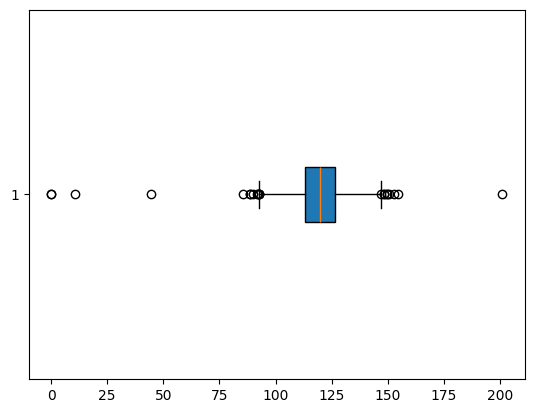

In [11]:
# Blood_Pressure
blood_pressure_data = data["Blood_Pressure"]
plt.boxplot(blood_pressure_data, vert=False, patch_artist=True) 
plt.show()

In [12]:
# Check for outliers
outliers_blood_pressure = blood_pressure_data[(blood_pressure_data < Q1["Blood_Pressure"] - 1.5 * IQR["Blood_Pressure"]) | (blood_pressure_data > Q3["Blood_Pressure"] + 1.5 * IQR["Blood_Pressure"])]
outliers_blood_pressure

43       90.027285
117      85.650116
192      91.953005
230     150.635116
249     148.131915
316       0.000000
323     148.158032
417      92.692620
526     149.568502
617      10.780000
715     149.463928
924      88.578819
1123    147.048143
1223     88.665138
1230    152.643476
1421     92.479926
1507     92.114951
1551      0.000000
1643     44.450000
1696    154.427656
1807     92.561036
1920    200.950000
Name: Blood_Pressure, dtype: float64

Disini terlihat bahwa kolom Blood Pressure juga memiliki outliers sehingga perlu diteliti lebih lanjut.

In [13]:
# Remove outliers
data = data.drop(outliers_blood_pressure.index)

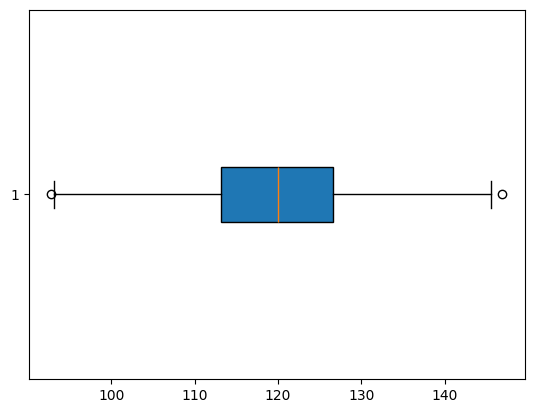

In [14]:
plt.boxplot(data["Blood_Pressure"], vert=False, patch_artist=True)
plt.show()

Berdasarkan data pada https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings, walaupun masih ada outliers, tetapi outliers tersebut masih dalam batas wajar sehingga tidak perlu ditangani lebih lanjut.

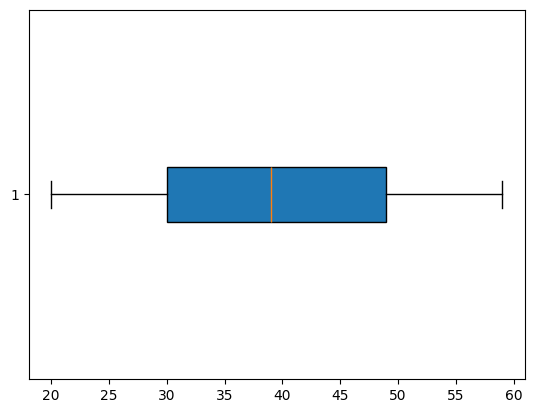

In [15]:
# Age
age_data = data["Age"]
plt.boxplot(age_data, vert=False, patch_artist=True) 
plt.show()

Karena tidak ada titik titik diluar whiskers, maka kolom age aman dari outliers

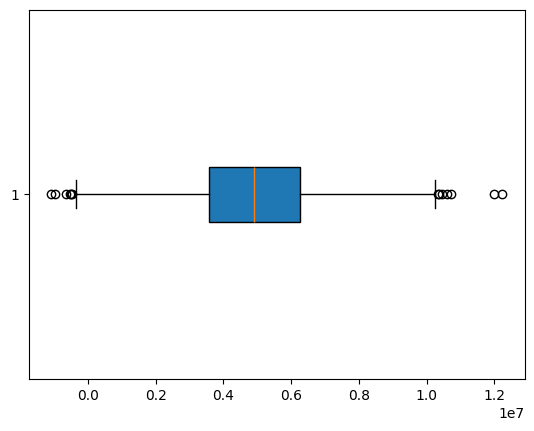

In [16]:
# Income
income_data = data["Income"]
plt.boxplot(income_data, vert=False, patch_artist=True) 
plt.show()

Disini terlihat kolom data income memiliki banyak outlier sehingga data tersebut perlu di cek lebih lanjut.

Dari boxplot tersebut, ada income yang bernilai negatif yang jelas hal ini tidak masuk akal sehingga untuk menangani ini, kita perlu membatasi income minimum adalah 0.

In [17]:
outliers_income = income_data[(income_data < Q1["Income"] - 1.5 * IQR["Income"]) | (income_data > Q3["Income"] + 1.5 * IQR["Income"])]
outliers_income

102    -5.235745e+05
453    -6.372663e+05
514    -4.944103e+05
579     1.044300e+07
673     1.060307e+07
835    -4.719274e+05
892    -9.677291e+05
1328    1.222749e+07
1460    1.036827e+07
1686    1.198891e+07
1697   -1.088987e+06
1947    1.073412e+07
1948    1.034308e+07
Name: Income, dtype: float64

In [18]:
# Tampilkan data yang memiliki nilai income negatif
outliers_income_negatif = outliers_income[outliers_income < 0]
outliers_income_negatif 

102    -5.235745e+05
453    -6.372663e+05
514    -4.944103e+05
835    -4.719274e+05
892    -9.677291e+05
1697   -1.088987e+06
Name: Income, dtype: float64

In [19]:
# Replace negative income with 0, use loc to avoid warning message
data.loc[data["Income"] < 0, "Income"] = 0

In [20]:
data[data["Income"] < 0]

,Age,Income,Gender,Education,Stress_Level,Exercise_Hours_Per_Week,Cholesterol_Level,Weight,Height,Blood_Pressure,Health_Status


{'whiskers': [<matplotlib.lines.Line2D at 0x1cfa7b09c90>,
 'caps': [<matplotlib.lines.Line2D at 0x1cfa7b0ae90>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1cfa7ae8990>],
 'medians': [<matplotlib.lines.Line2D at 0x1cfa7b0bed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cfa7b1c790>],
 'means': []}

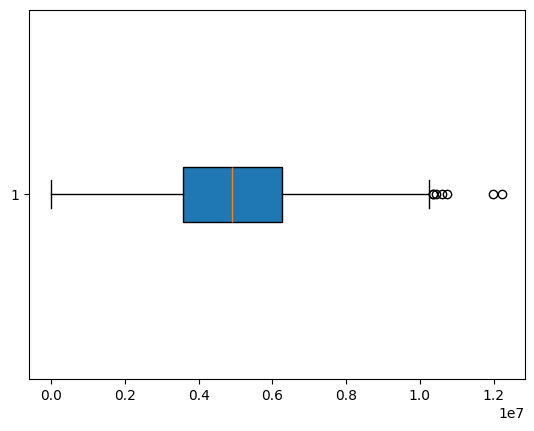

In [21]:
plt.boxplot(income_data, vert=False, patch_artist=True)

Disini, income yang negatif sudah di set ke 0. Untuk income yang melebihi Q3 + 1.5IQR, hal tersebut mungkin saja terjadi sehingga tidak diperlukan perubahan untuk outliers yang bernilai > Q3 +1.5IQR.

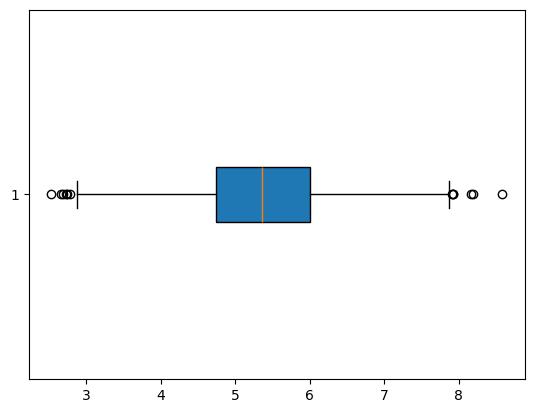

In [22]:
# Stress level
stress_level_data = data["Stress_Level"]
plt.boxplot(stress_level_data, vert=False, patch_artist=True) 
plt.show()

Disini terlihat bahwa kolom stress level juga memiliki outliers sehingga perlu diteliti lebih lanjut.

In [23]:
outliers_stress_level = stress_level_data[(stress_level_data < Q1["Stress_Level"] - 1.5 * IQR["Stress_Level"]) | (stress_level_data > Q3["Stress_Level"] + 1.5 * IQR["Stress_Level"])]
outliers_stress_level

13      2.528057
170     8.191571
201     7.908383
240     2.661764
306     7.916607
393     7.927514
1089    2.782488
1196    8.168885
1210    2.728318
1433    8.581327
1519    2.745202
1640    2.686308
Name: Stress_Level, dtype: float64

Dengan asumsi bahwa stress level berada pada interval 1-10, maka data diatas masih masuk dalam kategori wajar sehingga tidak perlu ditangani lebih lanjut

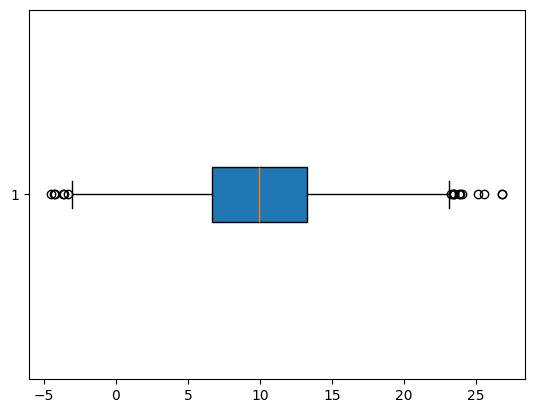

In [24]:
# Exercise_Hours_Per_Week
exercise_hours_per_week_data = data["Exercise_Hours_Per_Week"]
plt.boxplot(exercise_hours_per_week_data, vert=False, patch_artist=True) 
plt.show()

Disini terlihat bahwa kolom Exercise Hours Per Week juga memiliki outliers sehingga perlu diteliti lebih lanjut.

In [25]:
# Check outliers
outliers_exercise = exercise_hours_per_week_data[(exercise_hours_per_week_data < Q1["Exercise_Hours_Per_Week"] - 1.5 * IQR["Exercise_Hours_Per_Week"]) | (exercise_hours_per_week_data > Q3["Exercise_Hours_Per_Week"] + 1.5 * IQR["Exercise_Hours_Per_Week"])]
outliers_exercise

48      24.033132
180     25.530543
278     -3.632656
330     -4.499310
452     23.463102
479     23.506893
580     -4.247733
644     23.269785
893     23.103693
1056    -3.645436
1147    23.883280
1284    26.816358
1599    -3.343693
1677    26.795926
1706    -4.298969
1784    23.432592
1788    25.146327
1853    23.794101
Name: Exercise_Hours_Per_Week, dtype: float64

In [26]:
# Check for negative values
negatif_exercise = exercise_hours_per_week_data[exercise_hours_per_week_data < 0]
negatif_exercise

35     -1.927087
53     -0.432964
75     -0.309098
101    -0.950271
162    -3.063739
193    -1.552585
235    -0.064111
258    -0.273152
264    -0.392170
273    -0.764312
276    -0.352699
278    -3.632656
291    -0.342537
328    -2.077250
330    -4.499310
339    -0.757945
366    -1.905777
580    -4.247733
660    -1.218878
742    -0.490524
1056   -3.645436
1068   -0.950923
1143   -1.271801
1176   -1.300274
1207   -1.442528
1211   -0.942582
1250   -2.636253
1293   -2.501845
1319   -0.141838
1544   -1.669836
1545   -0.379740
1599   -3.343693
1623   -2.688027
1671   -1.207635
1699   -0.804646
1706   -4.298969
1708   -0.325989
1760   -1.326430
1835   -2.636172
1992   -0.954750
1993   -2.087057
Name: Exercise_Hours_Per_Week, dtype: float64

In [27]:
# Change negative values to 0
data.loc[data["Exercise_Hours_Per_Week"] < 0, "Exercise_Hours_Per_Week"] = 0

In [28]:
data[data["Exercise_Hours_Per_Week"] < 0]

,Age,Income,Gender,Education,Stress_Level,Exercise_Hours_Per_Week,Cholesterol_Level,Weight,Height,Blood_Pressure,Health_Status


{'whiskers': [<matplotlib.lines.Line2D at 0x1cfa5932dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1cfa5930750>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1cfa595fb10>],
 'medians': [<matplotlib.lines.Line2D at 0x1cfa59152d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cfa5917f10>],
 'means': []}

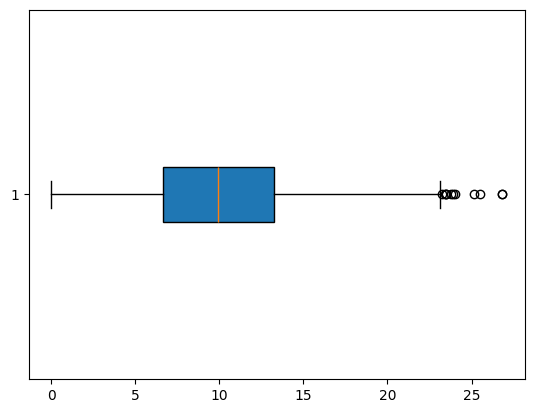

In [29]:
plt.boxplot(exercise_hours_per_week_data, vert=False, patch_artist=True)

Disini, exercise hour per week yang negatif sudah di set ke 0. Untuk exercise hour per week yang melebihi Q3 + 1.5IQR, hal tersebut mungkin saja terjadi (masih masuk akal dalam seminggu) sehingga tidak diperlukan perubahan untuk outliers yang bernilai > Q3 +1.5IQR.

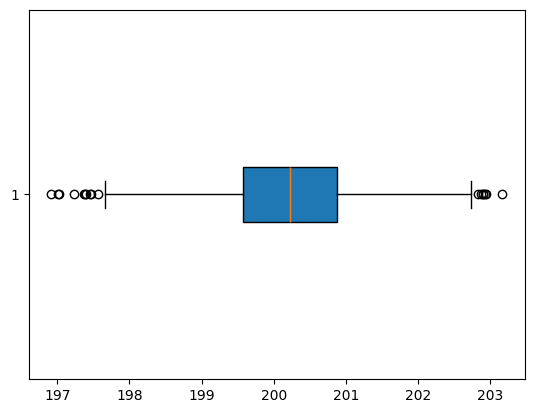

In [30]:
# Cholesterol_Level
cholesterol_level_data = data["Cholesterol_Level"]
plt.boxplot(cholesterol_level_data, vert=False, patch_artist=True) 
plt.show()

Disini terlihat bahwa kolom Cholesterol level juga memiliki outliers sehingga perlu diteliti lebih lanjut. Namun, berdasarkan artikel pada https://www.healthline.com/health/high-cholesterol/levels-by-age#:~:text=Recommended%20total%20cholesterol%20levels%20are%20under%20200%20milligrams,of%20the%20cholesterol%20that%20it%20needs%20to%20function, level normal kolesterol adalah < 200 sehingga semua outlier diatas masih bisa dibilang data yang wajar.

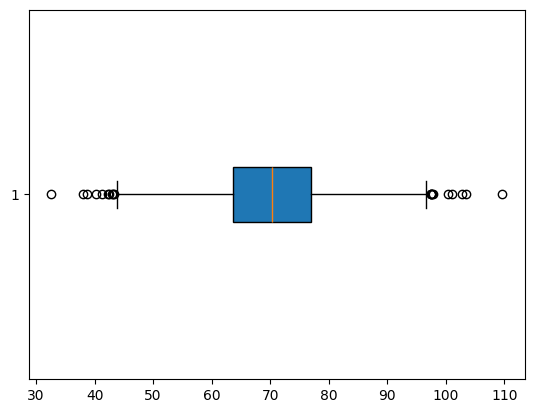

In [31]:
# Weight
weight_data = data["Weight"]
plt.boxplot(weight_data, vert=False, patch_artist=True) 
plt.show()

Disini terlihat bahwa kolom Weight juga memiliki outliers sehingga perlu diteliti lebih lanjut.

In [32]:
outliers_weight = weight_data[(weight_data < Q1["Weight"] - 1.5 * IQR["Weight"]) | (weight_data > Q3["Weight"] + 1.5 * IQR["Weight"])]
outliers_weight

236     109.609562
305     103.488182
397      43.210014
506     102.708167
711     100.333305
747      40.210278
779      42.428906
818      42.271182
887      97.577311
986      43.381050
1036     32.581758
1053     97.444777
1481     38.022481
1555     38.666547
1595     97.456489
1626     97.474679
1649    100.976404
1904     41.274350
1948     97.861295
1991     42.931331
Name: Weight, dtype: float64

Karena berat badan pada bagian outlier masih merupakan berat badan yang mungkin bagi manusia, maka outliers tersebut tidak perlu ditangani lebih lanjut.

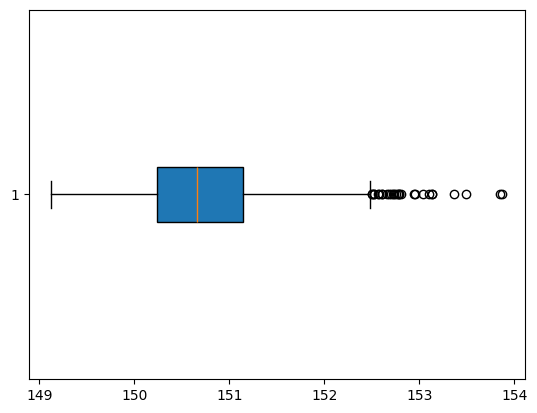

In [33]:
# Height
height_data = data["Height"]
plt.boxplot(height_data, vert=False, patch_artist=True) 
plt.show()

Disini terlihat bahwa kolom Height juga memiliki outliers sehingga perlu diteliti lebih lanjut. Namun, outliers pada data tersebut masih terbilang wajar untuk menyatakan tinggi manuasia sehingga tidak diperlukan penanganan lebih lanjut.

## 1. Blood Pressure

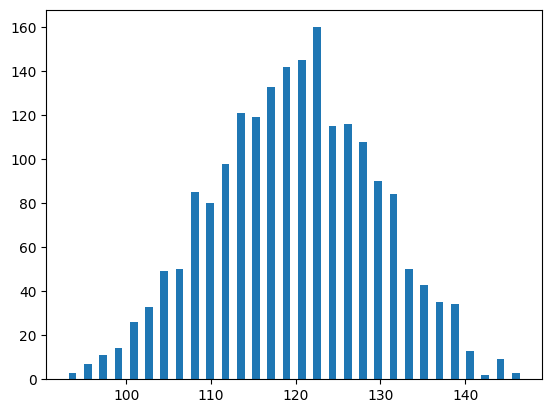

-0.03221883639967124
-0.34094189985379897
Statistics=14.132, p=0.001


In [34]:
plt.hist(data["Blood_Pressure"], bins=30, rwidth=0.5)
plt.show()
print (data["Blood_Pressure"].skew())
print (data["Blood_Pressure"].kurtosis())
stat, p = normaltest(data["Blood_Pressure"])
print('Statistics=%.3f, p=%.3f' % (stat, p))

### Jika kita tinjau dari skewness, maka data terdistribusi normal karena nilai skwenessnya mnedekati 0, tetapi jika kita menguji menggunakan kurtosis (kelancipan dari fdp), data tidak terdistribusi normal karena nilai kurtosisnya jauh dari 3. Jika kita menggunakan uji normal dengan bantuan library normaltest, diperoleh hasil p-value 0.001, karena p-value < 0.05 (nilai alpha), dapat disimpulkan data tidak terdistribusi normal.

## 2. Gender 

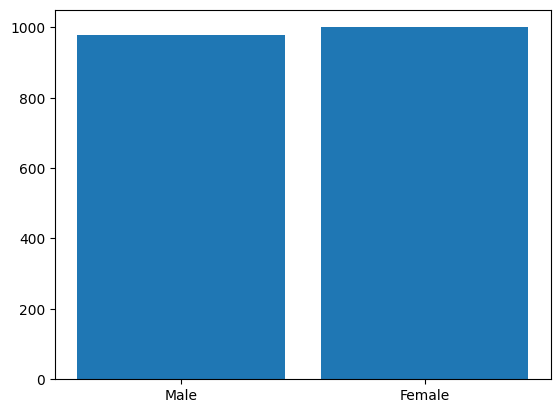

In [35]:
# Gender distribution
gender_data = data['Gender']
counts, bins, patches = plt.hist(gender_data, bins=2, rwidth=0.85)

# Menentukan label untuk setiap bin
bin_centers = 0.5 * np.diff(bins) + bins[:-1] # titik tengah bin
labels = ['Male', 'Female'] # label untuk setiap bin

plt.xticks(bin_centers, labels)  # menetapkan label pada titik tengah bin
plt.show()

## 3. Education 

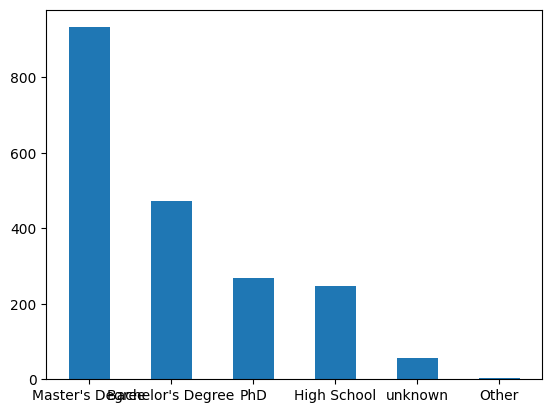

In [36]:
# Education distribution
education_data = data['Education']
counts, bins, patches = plt.hist(education_data, bins=6, rwidth=0.5)

# Menentukan label untuk setiap bin
bin_centers = 0.5 * np.diff(bins) + bins[:-1]  # titik tengah bin
labels = ['Master\'s Degree','Bachelor\'s Degree', 'PhD', 'High School', 'unknown', 'Other']  # label untuk setiap bin

plt.xticks(bin_centers, labels)  # menetapkan label pada titik tengah bin

plt.show()

## 4. Age

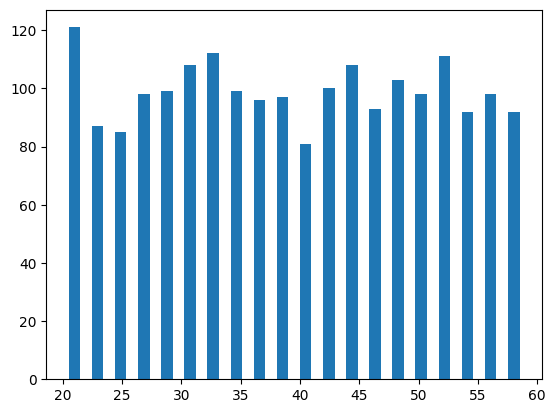

-0.003669656072957701
-1.1995106304725915
Statistics=1580.199, p=0.000


In [37]:
# Age distribution
plt.hist(data["Age"], bins=20, rwidth=0.5)
plt.show()

print (data["Age"].skew())
print (data["Age"].kurtosis())
stat, p = normaltest(data["Age"])
print('Statistics=%.3f, p=%.3f' % (stat, p))

### Jika kita tinjau dari skewness, maka data terdistribusi normal karena nilai skwenessnya mnedekati 0, tetapi jika kita menguji menggunakan kurtosis (kelancipan dari fdp), data tidak terdistribusi normal karena nilai kurtosisnya jauh dari 3. Jika kita menggunakan uji normal dengan bantuan library normaltest, diperoleh hasil p-value 0.000, karena p-value < 0.05 (nilai alpha), dapat disimpulkan data tidak terdistribusi normal. Dan data juga terlihat terdistribusi uniform.

## 5. Income

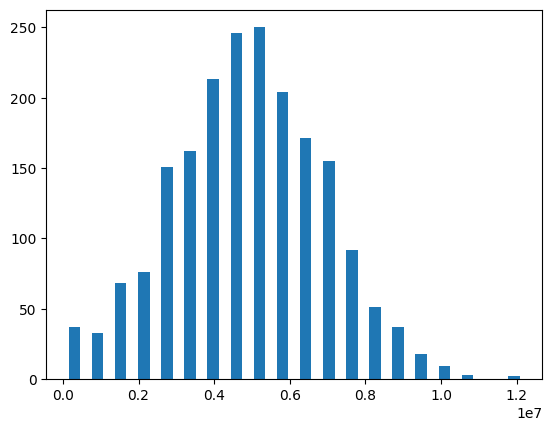

0.016751269910332222
-3.0736705938092954
Statistics=0.508, p=0.776


In [38]:
# Income distribution
plt.hist(data["Income"], bins=20, rwidth=0.5)
plt.show()

print (data["Income"].skew())
kurt = data["Income"].kurtosis()
excess_kurt = kurt - 3
print (excess_kurt)
stat, p = normaltest(data["Income"])
print('Statistics=%.3f, p=%.3f' % (stat, p))


### Jika kita tinjau dari skewness, maka data terdistribusi normal karena nilai skwenessnya mnedekati 0, tetapi jika kita menguji menggunakan kurtosis (kelancipan dari fdp), data tidak terdistribusi normal karena nilai kurtosisnya jauh dari 3. Jika kita menggunakan uji normal dengan bantuan library normaltest, diperoleh hasil p-value 0.776, karena p-value > 0.05 (nilai alpha), dapat disimpulkan data terdistribusi normal.

## 6. Stress Level

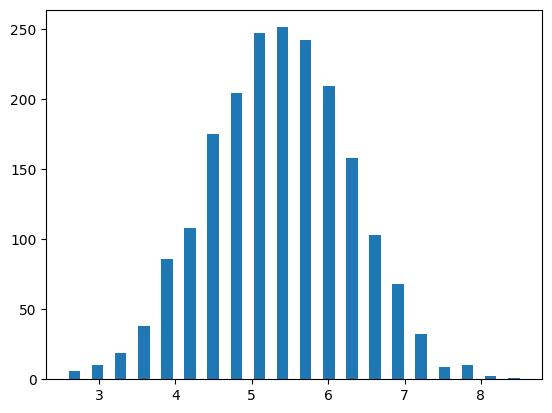

-0.01783091456783804
-0.12406333384333745
Statistics=1.436, p=0.488


In [39]:
# Stress level distribution
plt.hist(data["Stress_Level"], bins=20, rwidth=0.5)
plt.show()  

print (data["Stress_Level"].skew())
print (data["Stress_Level"].kurtosis())
stat, p = normaltest(data["Stress_Level"])
print('Statistics=%.3f, p=%.3f' % (stat, p))


### Jika kita tinjau dari skewness, maka data terdistribusi normal karena nilai skwenessnya mnedekati 0, tetapi jika kita menguji menggunakan kurtosis (kelancipan dari fdp), data tidak terdistribusi normal karena nilai kurtosisnya jauh dari 3. Jika kita menggunakan uji normal dengan bantuan library normaltest, diperoleh hasil p-value 0.488, karena p-value > 0.05 (nilai alpha), dapat disimpulkan data terdistribusi normal.

## 7. Exercise Hours per Week

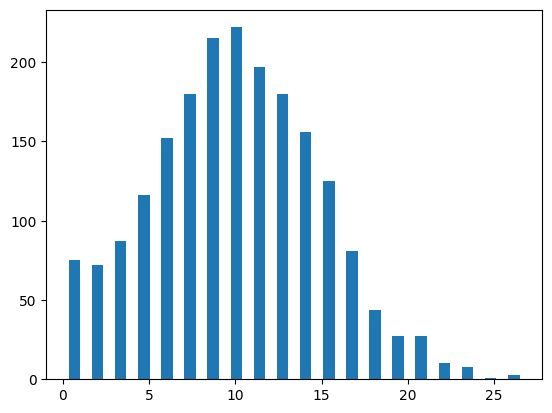

0.1525871203236051
-0.15376819384934848
Statistics=9.786, p=0.007


In [40]:
# Cholesterol level distribution
plt.hist(data["Exercise_Hours_Per_Week"], bins=20, rwidth=0.5)
plt.show()

print (data["Exercise_Hours_Per_Week"].skew())
print (data["Exercise_Hours_Per_Week"].kurtosis())
stat, p = normaltest(data["Exercise_Hours_Per_Week"])
print('Statistics=%.3f, p=%.3f' % (stat, p))



### Jika kita tinjau dari skewness, maka data terdistribusi normal karena nilai skwenessnya mnedekati 0, tetapi jika kita menguji menggunakan kurtosis (kelancipan dari fdp), data tidak terdistribusi normal karena nilai kurtosisnya jauh dari 3. Jika kita menggunakan uji normal dengan bantuan library normaltest, diperoleh hasil p-value 0.523, karena p-value > 0.05 (nilai alpha), dapat disimpulkan data terdistribusi normal.

## 8. Weight

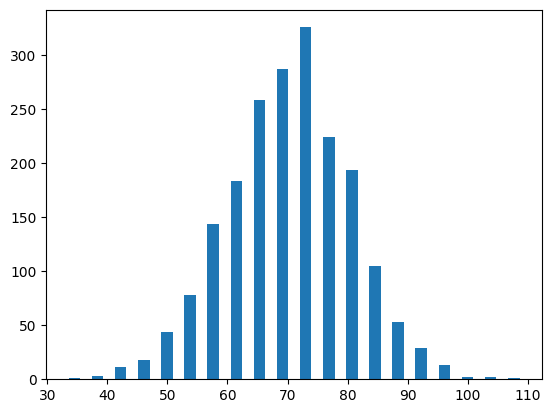

-0.055145554642524186
0.11260679516068262
Statistics=2.065, p=0.356


In [41]:
# Weight distribution
plt.hist(data["Weight"], bins=20, rwidth=0.5)
plt.show()

print (data["Weight"].skew())
print (data["Weight"].kurtosis())
stat, p = normaltest(data["Weight"])
print('Statistics=%.3f, p=%.3f' % (stat, p))


### Jika kita tinjau dari skewness, maka data terdistribusi normal karena nilai skwenessnya mnedekati 0, tetapi jika kita menguji menggunakan kurtosis (kelancipan dari fdp), data tidak terdistribusi normal karena nilai kurtosisnya jauh dari 3. Jika kita menggunakan uji normal dengan bantuan library normaltest, diperoleh hasil p-value 0.356, karena p-value > 0.05 (nilai alpha), dapat disimpulkan data  terdistribusi normal.

## 9. Height

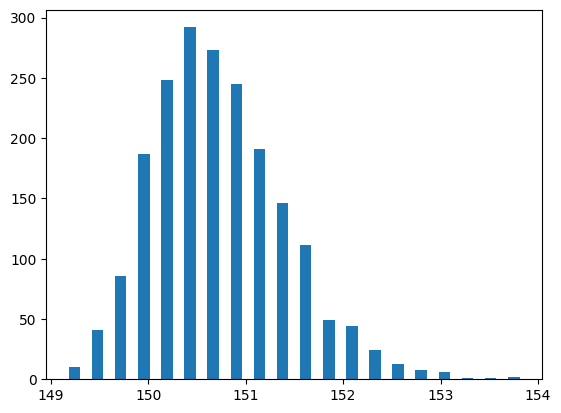

0.6555089940792477
0.7091281485649175
Statistics=143.721, p=0.000


In [42]:
# Height distribution
plt.hist(data["Height"], bins=20, rwidth=0.5)
plt.show()

print (data["Height"].skew())
print (data["Height"].kurtosis())
stat, p = normaltest(data["Height"])
print('Statistics=%.3f, p=%.3f' % (stat, p))



### Jika kita tinjau dari skewness, maka data tidak terdistribusi normal karena nilai skewnessnya jauh dari 0, tetapi jika kita menguji menggunakan kurtosis (kelancipan dari fdp), data tidak terdistribusi normal karena nilai kurtosisnya jauh dari 3. Jika kita menggunakan uji normal dengan bantuan library normaltest, diperoleh hasil p-value 0.000, karena p-value < 0.05 (nilai alpha), dapat disimpulkan data tidak terdistribusi normal. Karena nilai skew positif, maka data ini memiliki distribusi right-skeewed.

## 10. Health Status

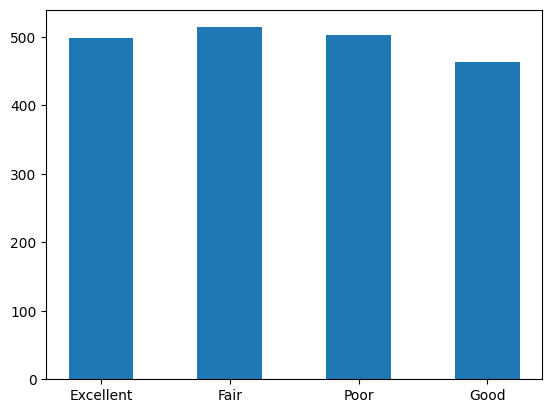

In [43]:
# Health Status
health_status_data_data = data['Health_Status']
counts, bins, patches = plt.hist(health_status_data_data, bins=4, rwidth=0.5)

# Menentukan label untuk setiap bin
bin_centers = 0.5 * np.diff(bins) + bins[:-1]  # titik tengah bin

plt.xticks(bin_centers)  # menetapkan label pada titik tengah bin

plt.show()

## 11. Cholesterol Level

-0.06927019917155477
0.011699808555181157
Statistics=1.613, p=0.446


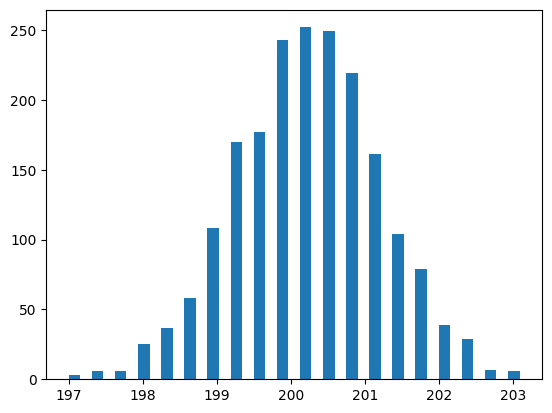

In [44]:
# Cholesterol Level
cholesterol_level_data = data['Cholesterol_Level']
counts, bins, patches = plt.hist(cholesterol_level_data, bins=20, rwidth=0.5)
print (data["Cholesterol_Level"].skew())
print (data["Cholesterol_Level"].kurtosis())
stat, p = normaltest(data["Cholesterol_Level"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
plt.show()

### Jika kita tinjau dari skewness, maka data terdistribusi normal karena nilai skewnessnya mendekati 0, tetapi jika kita menguji menggunakan kurtosis (kelancipan dari fdp), data tidak terdistribusi normal karena nilai kurtosisnya jauh dari 3. Jika kita menggunakan uji normal dengan bantuan library normaltest, diperoleh hasil p-value 0.446, karena p-value > 0.05 (nilai alpha), dapat disimpulkan data terdistribusi normal.

# One-Sample Hypotesis


#### 1. Lembaga riset saat ini sedang mempertanyakan data berat badan individu yang disimpan untuk kepentingan riset lanjutan. Identifikasilah apakah rata-rata berat badan pasien diatas 65 kg?


1. H0 : Mean of weight = 65
2. H1 : Mean of weight > 65 
3. Significance level = 0.05
4. One-tailed test (greater than)
5. p-value: 0.00012148092594777005
6. Kesimpulan: Reject H0

In [45]:
# H0 : Mean of weight = 65
# H1 : Mean of weight > 65 
# Significance level = 0.05
# One-tailed test (greater than)

# Collect the sample and calculate sample statistics
weight_sample = data["Weight"].sample(n=100, random_state=1)
sample_mean = weight_sample.mean()
sample_std = weight_sample.std(ddof=1)
population_mean = 65
n = 100

# Calculate the z-value
z_value = (sample_mean - population_mean) / (sample_std / np.sqrt(n))

# Calculate the p-value
p_value = 1 - stats.norm.cdf(z_value)

# Compare the p-value to the significance level
alpha = 0.05
reject_null = p_value < alpha

print(f"z-value: {z_value}")
print(f"p-value: {p_value}")

if reject_null:
    print("Reject H0")
else:
    print("Fail to reject H0")



z-value: 3.669566792638645
p-value: 0.00012148092594777005
Reject H0


Karena p-value < 0.05, maka H0 ditolak dan rata-rata badan pasien di atas 65 kg

#### 2. Tekanan darah yang normal berada pada rentang 120 mmHg. Lembaga riset perlu untuk memastikan apakah data individu yang diukur cukup normal. Periksalah apakah rata-rata tekanan darah sistole bernilai 120 mmHg?

1. H0 : Rata-rata tekanan darah sistole bernilai sama dengan 120 mmHg
2. H1 : Rata-rata tekanan darah sistole bernilai tidak sama dengan 120 mmHg
3. Significance level = 0.05
4. Two-tailed test
5. p-value: 0.30781486174797523
6. Kesimpulan: Fail to reject H0

In [46]:
# H0 : Rata-rata tekanan darah sistole bernilai sama dengan 120 mmHg
# H1 : Rata-rata tekanan darah sistole bernilai tidak sama dengan 120 mmHg
# Significance level = 0.05
# Two-tailed test

# Collect the sample and calculate sample statistics
blood_pressure_sample = data["Blood_Pressure"].sample(n=100, random_state=1)
sample_mean = blood_pressure_sample.mean()
sample_std = blood_pressure_sample.std(ddof=1)
population_mean = 120
n = 100

# Calculate the z-value
z_value = (sample_mean - population_mean) / (sample_std / np.sqrt(n))

# Calculate the p-value
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_value)))

# Compare the p-value to the significance level
alpha = 0.05
reject_null = p_value < alpha

print(f"z-value: {z_value}")
print(f"p-value: {p_value}")

if reject_null:
    print("Reject H0")
else:
    print("Fail to reject H0")

z-value: -1.0198178377574048
p-value: 0.30781486174797523
Fail to reject H0


Karena p-value > 0.05, maka gagal menolak H0 dan rata-rata tekanan darah sistole bernilai 120 mmHg

#### 3. Periksalah apakah data 200 individu pertama pengujian (baris teratas) memiliki rata-rata waktu olahraga per minggu tidak sama dengan 15 jam?

1. H0 : Data 200 individu pertama memiliki rata-rata waktu olahraga per minggu sama dengan 15 jam
2. H1 : Data 200 individu pertama memiliki rata-rata waktu olahraga per minggu tidak sama dengan 15 jam
3. Significance level = 0.05
4. Two-tailed test
5. p-value: 0
6. Kesimpulan: Reject H0

In [47]:
# H0 : Data 200 individu pertama memiliki rata-rata waktu olahraga per minggu sama dengan 15 jam
# H1 : Data 200 individu pertama memiliki rata-rata waktu olahraga per minggu tidak sama dengan 15 jam
# Significance level = 0.05
# Two-tailed test

# Collect the sample and calculate sample statistics
exercise_hours_per_week_sample = data["Exercise_Hours_Per_Week"].head(200)
sample_mean = exercise_hours_per_week_sample.mean()
sample_std = exercise_hours_per_week_sample.std(ddof=1)
population_mean = 15
n = 200

# Calculate the z-value
z_value = (sample_mean - population_mean) / (sample_std / np.sqrt(n))

# Calculate the p-value
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_value)))

# Compare the p-value to the significance level
alpha = 0.05
reject_null = p_value < alpha

print(f"z statistic: {z_value}")
print(f"p-value: {p_value}")

if reject_null:
    print("Reject H0")
else:
    print("Fail to reject H0")

z statistic: -14.823803025227171
p-value: 0.0
Reject H0


Karena p-value < 0.05, maka H0 ditolak dan rata-rata waktu olahraga per minggu tidak sama dengan 15 jam

#### 4. Apakah penduduk dengan pendapatan yang lebih besar dari Rp 7.500.000,00 tidak sama dengan 30% dari data keseluruhan individu? 

1. H0 : Jumlah penduduk dengan pendapatan > 7,5 juta sama dengan 30% dari jumlah data keseluruhan
2. HA : Jumlah penduduk dengan pendapatan > 7,5 juta tidak sama dengan 30% dari jumlah data keseluruhan
3. Significance level = 0.05
4. Two-tailed test
5. p-value: 0
6. Kesimpulan: Reject H0

In [48]:
# H0 : Jumlah penduduk dengan pendapatan > 7,5 juta sama dengan 30% dari jumlah data keseluruhan
# HA : Jumlah penduduk dengan pendapatan > 7,5 juta tidak sama dengan 30% dari jumlah data keseluruhan
# Significance level = 0.05
# Two-tailed test

# Find the sample proportion for people with income > 7,500,000
income_more_than_75 = data[data["Income"] > 7500000]
p_hat = len(income_more_than_75) / len(data)

# Given population proportion
p = 0.3
n = len(data)

# Calculate the standard error under H0
SE = np.sqrt(p * (1 - p) / n)

# Calculate the Z statistic
Z = (p_hat - p) / SE

# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - norm.cdf(abs(Z)))

print(f"Z statistic: {Z}")
print(f"p-value: {p_value}")

# Compare the p-value to the significance level
alpha = 0.05
reject_null = p_value < alpha

if reject_null:
    print("Reject H0")
else:
    print("Fail to reject H0")

Z statistic: -20.038395423663218
p-value: 0.0
Reject H0


Karena p-value < 0.05, maka H0 ditolak dan jumlah penduduk yang memiliki pendapatan yang lebih besar dari Rp 7.500.000,00 tidak sama dengan 30% dari jumlah data keseluruhan individu

# Two-Sample Hypotesis
### Lembaga riset membagi data individu menjadi dua bagian, yaitu data individu yang lebih awal masuk data penelitian (bagian atas) dan yang baru saja (bagian bawah).

In [49]:
# Top data
top_data = data.head(100)

# Bottom data
bottom_data = data.tail(100)

#### 1. Periksa apakah rata-rata berat badan individu yang lebih awal masuk data penelitian sama dengan rata-rata berat badan individu yang masuk baru saja?


1. H0 : Average of weight in top data = Average of weight in bottom data
2. HA : Average of weight in top data != Average of weight in bottom data
3. Significance level = 0.05
4. Two-tailed test
5. p-value: 0.5491277875257794
6. Kesimpulan: Fail to reject H0

In [50]:
# H0 : Average of weight in top data = Average of weight in bottom data
# HA : Average of weight in top data != Average of weight in bottom data
# Significance level = 0.05
# Two-tailed test

# Sample mean
top_weight_mean = top_data["Weight"].mean()
bottom_weight_mean = bottom_data["Weight"].mean()

# Sample standard deviation
top_weight_std = top_data["Weight"].std()
bottom_weight_std = bottom_data["Weight"].std()

# Sample size
top_weight_n = len(top_data)
bottom_weight_n = len(bottom_data)

# Calculate the Z value
Z = (top_weight_mean - bottom_weight_mean) / np.sqrt((top_weight_std**2 / top_weight_n) + (bottom_weight_std**2 / bottom_weight_n))

# Calculate the p-value
p_value = 2 * (1 - norm.cdf(abs(Z)))

print(f"Z statistic: {Z}")
print(f"p-value: {p_value}")
# Make a decision based on the p-value
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")



Z statistic: -0.5990676284535051
p-value: 0.5491277875257794
Fail to reject H0


Karena p-value > 0.05, maka gagal menolak H0 dan rata-rata berat badan individu yang lebih awal masuk data penelitian sama dengan rata-rata berat badan individu yang baru masuk

#### 2. Bagaimana dengan pendapatan individu, apakah pendapatan sistole individu yang lebih awal masuk data penelitian lebih besar Rp 1.250.000,00 dari yang baru saja masuk?

1. H0 : average income of top data - average income of bottom data = 1250000
2. HA : average income of top data - average income of bottom data != 1250000
3. Significance level = 0.05
4. Two-tailed test
5. p-value: 3.6964486245016914e-05
6. Kesimpulan: Reject H0

In [51]:
# H0 : average income of top data - average income of bottom data = 1250000
# HA : average income of top data - average income of bottom data != 1250000
# Significance level = 0.05
# Two-tailed test

# Sample mean
top_income_mean = top_data["Income"].mean()
bottom_income_mean = bottom_data["Income"].mean()

# Sample standard deviation
top_income_std = top_data["Income"].std()
bottom_income_std = bottom_data["Income"].std()

# Sample size
top_income_n = len(top_data)
bottom_income_n = len(bottom_data)

# Calculate the Z value
Z = (top_income_mean - bottom_income_mean - 1250000) / np.sqrt((top_income_std**2 / top_income_n) + (bottom_income_std**2 / bottom_income_n))

# Calculate the p-value
p_value = 2 * (1 - norm.cdf(abs(Z)))

print(f"Z statistic: {Z}")
print(f"p-value: {p_value}")
# Make a decision based on the p-value
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")


Z statistic: -4.12567755915035
p-value: 3.6964486245016914e-05
Reject H0


Karena p-value < 0.05, maka H0 ditolak dan pendapatan sistole individu yang lebih awal masuk data penelitian lebih besar Rp 1.250.000,00 dari yang baru masuk

#### 3. Lembaga riset ingin membandingkan kondisi kesehatan individu dari dua bagian data. Apakah variansi tekanan darah individu yang lebih awal masuk data penelitian sama dengan yang baru saja masuk?


1. H0 : variance blood pressure of top data = variance blood pressure of bottom data
2. HA : variance blood pressure of top data != variance blood pressure of bottom data
3. Significance level = 0.05
4. Two-tailed test
5. p-value: 0.3590528867528784
6. Kesimpulan: Fail to reject H0

In [52]:
# H0 : variance blood pressure of top data = variance blood pressure of bottom data
# HA : variance blood pressure of top data != variance blood pressure of bottom data
# Significance level = 0.05
# Two-tailed test

# Sample variance
top_blood_pressure_var = top_data["Blood_Pressure"].var()
bottom_blood_pressure_var = bottom_data["Blood_Pressure"].var()

# Sample size
top_blood_pressure_n = len(top_data)
bottom_blood_pressure_n = len(bottom_data)

# Calculate the F value
F = top_blood_pressure_var / bottom_blood_pressure_var

# Calculate the degrees of freedom
df_top = top_blood_pressure_n - 1
df_bottom = bottom_blood_pressure_n - 1

# Calculate the p-value
p_value = 2 * min(f.cdf(F, df_top, df_bottom), 1 - f.cdf(F, df_top, df_bottom))

print(p_value)
# Make a decision based on the p-value
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")
    


0.3590528867528784
Fail to reject H0


Karena p-value > 0.05, maka gagal menolak H0 dan variansi tekanan darah individu yang lebih awal masuk data penelitian sama dengan yang baru masuk

#### 4.Apakah proporsi waktu olahraga yang lebih dari 8 jam per minggu pada data individu awal lebih besar daripada kuantitas proporsi pada data individu akhir dengan waktu olahraga yang sama?

1. H0 : Exercise hours per week of top data > 8 = Exercise hours per week of bottom data > 8
2. HA : Exercise hours per week of top data > 8 > Exercise hours per week of bottom data > 8
3. Significance level = 0.05
4. One-tailed test (less than)
5. p-value: 0.5575051193299
6. Kesimpulan: Fail to reject H0

In [53]:
# H0 : Exercise hours per week of top data > 8 = Exercise hours per week of bottom data > 8
# HA : Exercise hours per week of top data > 8 > Exercise hours per week of bottom data > 8

# Significance level = 0.05
# One-tailed test (less than)

# Collect the sample and calculate sample statistics
top_exercise_hours_per_week_more_than_eight = top_data[top_data["Exercise_Hours_Per_Week"] > 8]
bottom_exercise_hours_per_week_more_than_eight = bottom_data[bottom_data["Exercise_Hours_Per_Week"] > 8]

# Sample proportion
top_p = len(top_exercise_hours_per_week_more_than_eight) / len(top_data)
bottom_p = len(bottom_exercise_hours_per_week_more_than_eight) / len(bottom_data)

# Pooled proportions
p = (len(top_exercise_hours_per_week_more_than_eight) + len(bottom_exercise_hours_per_week_more_than_eight)) / (len(top_data) + len(bottom_data))

# Calculate the standard error under H0
SE = np.sqrt(p * (1 - p) * (1 / len(top_data) + 1 / len(bottom_data)))

# Calculate the Z statistic
Z = (top_p - bottom_p) / SE

# Calculate the p-value for a one-tailed test
p_value = 1 - norm.cdf(Z)

print(f"Z statistic: {Z}")

print(f"p-value: {p_value}")

# Compare the p-value to the significance level
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")


Z statistic: -0.14464677894104197
p-value: 0.5575051193299
Fail to reject H0


Karena hasil p-value > alpha (0.05), maka kita gagal menolak H0.